In [2]:
import pandas as pd
pd.options.display.max_columns = None
import re

In [3]:
df = pd.read_csv("union_datos.csv")

In [4]:
df.columns

Index(['age', 'gender', 'pais', 'estudios', 'puesto_trabajo', 'experiencia',
       'lenguaje_recomendado', 'experiencia_ML', 'industria', 'tamaño_empresa',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=138)

In [5]:
df.head(3)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",$0-999,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,"MySQL ,

---

### Renombrado columnas

---

In [7]:
no_nulos_q39 = df.loc[:,'Q39_Part_1':'Q39_OTHER'].notnull().sum()/df.shape[0]*100 # Porcentaje de no nulos en la pregunta Q39 - Quedarnos solo con las más representativas

In [8]:
for col in no_nulos_q39.index:
    print (col, '--->', df[col].value_counts().index[0], '--->', (df.loc[:,col].notnull().sum()/df.shape[0]*100).round(2),'%' )

Q39_Part_1 --->  Plotly Dash  ---> 1.13 %
Q39_Part_2 --->  Streamlit  ---> 1.49 %
Q39_Part_3 --->  NBViewer  ---> 0.52 %
Q39_Part_4 --->  GitHub  ---> 17.66 %
Q39_Part_5 --->  Personal blog  ---> 2.71 %
Q39_Part_6 --->  Kaggle  ---> 11.8 %
Q39_Part_7 --->  Colab  ---> 7.12 %
Q39_Part_8 --->  Shiny  ---> 1.17 %
Q39_Part_9 ---> I do not share my work publicly ---> 12.19 %
Q39_OTHER ---> Other ---> 1.18 %


### Q39 donde compartes publicamente tu trabajo
    Q39_Part_1 --->  Plotly Dash  ---> 1.13 %
    Q39_Part_2 --->  Streamlit  ---> 1.49 %
    Q39_Part_3 --->  NBViewer  ---> 0.52 %
    Q39_Part_4 --->  GitHub  ---> 17.66 %
    Q39_Part_5 --->  Personal blog  ---> 2.71 %
    Q39_Part_6 --->  Kaggle  ---> 11.8 %
    Q39_Part_7 --->  Colab  ---> 7.12 %
    Q39_Part_8 --->  Shiny  ---> 1.17 %
    Q39_Part_9 ---> I do not share my work publicly ---> 12.19 %
    Q39_OTHER ---> Other ---> 1.18 %

Nos quedamos con las columnas más representativas: GitHub, I do not share my work publicly, Kaggle, Colab

In [9]:
df.drop(['Q39_Part_1', 'Q39_Part_2','Q39_Part_3','Q39_Part_5','Q39_Part_8','Q39_OTHER'], axis = 1, inplace = True)

In [10]:
#Cambiamos el nombre a las columnas de Q39
col_q39 = {'Q39_Part_4': 'Q39_GitHub', 'Q39_Part_9': 'Q39_None', 'Q39_Part_6': 'Q39_Kaggle','Q39_Part_7': 'Q39_Colab' }
df.rename(columns = col_q39, inplace = True)

In [11]:
df.head(2)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39_GitHub,Q39_Kaggle,Q39_Colab,Q39_None,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,GitHub,Kaggle,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [12]:
no_nulos_q40 = df.loc[:,'Q40_Part_1':'Q40_OTHER'].notnull().sum()/df.shape[0]*100 # Porcentaje de no nulos en la pregunta Q40
no_nulos_q40.index


Index(['Q40_Part_1', 'Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_5',
       'Q40_Part_6', 'Q40_Part_7', 'Q40_Part_8', 'Q40_Part_9', 'Q40_Part_10',
       'Q40_Part_11', 'Q40_OTHER'],
      dtype='object')

In [13]:
for col in no_nulos_q40.index:
    print (col, '--->', df[col].value_counts().index[0], '--->', (df.loc[:,col].notnull().sum()/df.shape[0]*100).round(2),'%' )

Q40_Part_1 ---> Coursera ---> 37.15 %
Q40_Part_2 ---> edX ---> 11.66 %
Q40_Part_3 ---> Kaggle Learn Courses ---> 33.38 %
Q40_Part_4 ---> DataCamp ---> 15.39 %
Q40_Part_5 ---> Fast.ai ---> 4.45 %
Q40_Part_6 ---> Udacity ---> 10.79 %
Q40_Part_7 ---> Udemy ---> 24.79 %
Q40_Part_8 ---> LinkedIn Learning ---> 10.37 %
Q40_Part_9 ---> Cloud-certification programs (direct from AWS, Azure, GCP, or similar) ---> 6.95 %
Q40_Part_10 ---> University Courses (resulting in a university degree) ---> 18.8 %
Q40_Part_11 ---> None ---> 6.78 %
Q40_OTHER ---> Other ---> 8.01 %


### Q40 en que plataformas has realizado cursos de data science
    Q40_Part_1 ---> Coursera ---> 37.15 %
    Q40_Part_2 ---> edX ---> 11.66 %
    Q40_Part_3 ---> Kaggle Learn Courses ---> 33.38 %
    Q40_Part_4 ---> DataCamp ---> 15.39 %
    Q40_Part_5 ---> Fast.ai ---> 4.45 %
    Q40_Part_6 ---> Udacity ---> 10.79 %
    Q40_Part_7 ---> Udemy ---> 24.79 %
    Q40_Part_8 ---> LinkedIn Learning ---> 10.37 %
    Q40_Part_9 ---> Cloud-certification programs (direct from AWS, Azure, GCP, or similar) ---> 6.95 %
    Q40_Part_10 ---> University Courses (resulting in a university degree) ---> 18.8 %
    Q40_Part_11 ---> None ---> 6.78 %
    Q40_OTHER ---> Other ---> 8.01 %


In [14]:
lista =[]
for col in no_nulos_q40.index:
    plat = df[col].value_counts().index[0]
    lista.append(re.findall('Q\d{2}',col)[0]+'_'+plat.replace(' ','_').lower())
lista

['Q40_coursera',
 'Q40_edx',
 'Q40_kaggle_learn_courses',
 'Q40_datacamp',
 'Q40_fast.ai',
 'Q40_udacity',
 'Q40_udemy',
 'Q40_linkedin_learning',
 'Q40_cloud-certification_programs_(direct_from_aws,_azure,_gcp,_or_similar)',
 'Q40_university_courses_(resulting_in_a_university_degree)',
 'Q40_none',
 'Q40_other']

In [15]:
col_q40 = dict(zip(no_nulos_q40.index, lista))
col_q40


{'Q40_Part_1': 'Q40_coursera',
 'Q40_Part_2': 'Q40_edx',
 'Q40_Part_3': 'Q40_kaggle_learn_courses',
 'Q40_Part_4': 'Q40_datacamp',
 'Q40_Part_5': 'Q40_fast.ai',
 'Q40_Part_6': 'Q40_udacity',
 'Q40_Part_7': 'Q40_udemy',
 'Q40_Part_8': 'Q40_linkedin_learning',
 'Q40_Part_9': 'Q40_cloud-certification_programs_(direct_from_aws,_azure,_gcp,_or_similar)',
 'Q40_Part_10': 'Q40_university_courses_(resulting_in_a_university_degree)',
 'Q40_Part_11': 'Q40_none',
 'Q40_OTHER': 'Q40_other'}

In [16]:
col_q40 = {'Q40_Part_1': 'Q40_coursera',
 'Q40_Part_2': 'Q40_edx',
 'Q40_Part_3': 'Q40_kaggle_learn_courses',
 'Q40_Part_4': 'Q40_datacamp',
 'Q40_Part_5': 'Q40_fast.ai',
 'Q40_Part_6': 'Q40_udacity',
 'Q40_Part_7': 'Q40_udemy',
 'Q40_Part_8': 'Q40_linkedin_learning',
 'Q40_Part_9': 'Q40_cloud-certification',
 'Q40_Part_10': 'Q40_university_courses',
 'Q40_Part_11': 'Q40_none',
 'Q40_OTHER': 'Q40_other'}
df.rename(columns = col_q40, inplace = True)

In [17]:
df.head(2)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39_GitHub,Q39_Kaggle,Q39_Colab,Q39_None,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,GitHub,Kaggle,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


---

In [18]:
df['Q31_B_Part_1'].value_counts().index[0] #Sacamos el nombre de la columna Q31_B_part_1 para ver si podemos automatizar el cambio de nombres

' Amazon SageMaker '

In [19]:
df.loc[:,'Q29_B_Part_1':'Q29_B_OTHER'].notnull().sum()/df.shape[0]*100 # Porcentaje de no nulos en la pregunta Q29

Q29_B_Part_1    20.706118
Q29_B_Part_2    22.303931
Q29_B_Part_3    28.864590
Q29_B_Part_4     3.734648
Q29_B_OTHER      0.300312
dtype: float64

In [20]:
df.loc[:,'Q27_B_Part_1':'Q27_B_OTHER'].notnull().sum()/df.shape[0]*100 # Porcentaje de no nulos en la pregunta Q27

Q27_B_Part_1     28.853040
Q27_B_Part_2     21.745659
Q27_B_Part_3     28.814538
Q27_B_Part_4      9.968044
Q27_B_Part_5      6.591460
Q27_B_Part_6      3.503638
Q27_B_Part_7      3.018519
Q27_B_Part_8      3.049320
Q27_B_Part_9      2.433296
Q27_B_Part_10     2.117584
Q27_B_Part_11     8.616640
Q27_B_OTHER       1.035691
dtype: float64

In [24]:
df['Q28'].value_counts()/df.shape[0]*100

 Amazon Web Services (AWS)                                 3.218727
 Google Cloud Platform (GCP)                               2.841412
They all had a similarly enjoyable developer experience    2.718207
 Microsoft Azure                                           1.747969
None were satisfactory                                     0.365764
 IBM Cloud / Red Hat                                       0.319563
 Oracle Cloud                                              0.231009
 Alibaba Cloud                                             0.130905
Other                                                      0.119355
 VMware Cloud                                              0.115505
 SAP Cloud                                                 0.088553
 Salesforce Cloud                                          0.088553
 Tencent Cloud                                             0.053902
Name: Q28, dtype: float64

In [25]:
df['IDE'].value_counts() #Sacamos los valores únicos de la columna IDE

Jupyter Notebook                                                                                                                   2341
Visual Studio Code (VSCode) ,Jupyter Notebook                                                                                      1412
Visual Studio Code (VSCode)                                                                                                         939
PyCharm ,Jupyter Notebook                                                                                                           820
Visual Studio Code (VSCode) ,PyCharm ,Jupyter Notebook                                                                              554
                                                                                                                                   ... 
RStudio ,Visual Studio , Spyder, Vim / Emacs,Jupyter Notebook                                                                         1
Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Vi

In [26]:
df_lenguaje = df['lenguaje_utilizado'].str.split(',',expand=True) #Creamos el df_lenguaje con los valores de la columna lenguaje_utilizado separado por columnas
df_lenguaje

,0,1,2,3,4,5,6,7,8,9,10,11
0,Python,R,None,None,None,None,None,None,None,None,None,None
1,SQL,C,C++,Java,None,None,None,None,None,None,None,None
2,Python,C++,Java,None,None,None,None,None,None,None,None,None
3,Python,None,None,None,None,None,None,None,None,None,None,None
4,Python,C,MATLAB,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
25968,Python,SQL,Javascript,Bash,None,None,None,None,None,None,None,None
25969,Python,None,None,None,None,None,None,None,None,None,None,None
25970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,Python,SQL,None,None,None,None,None,None,None,None,None,None


In [27]:
#Sacamos los valores únicos de df_lenguaje
df_lenguaje.stack().value_counts()

Python         21860
 SQL           10756
 C++            5535
 R              5334
 Java           4769
 C              4709
 Javascript     4332
 MATLAB         2935
 Other          2575
 Bash           2216
 None            319
 Julia           305
 Swift           242
dtype: int64

In [28]:
df_IDE = df['IDE'].str.split(',',expand=True) #Creamos el df_lenguaje con los valores de la columna lenguaje_utilizado separado por columnas
df_IDE.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Vim / Emacs,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Notepad++,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None,None
2,PyCharm,Jupyter Notebook,Other,None,None,None,None,None,None,None,None,None,None,None
3,Spyder,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None,None
4,Spyder,MATLAB,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None


In [29]:
# Contamos los valores únicos del df_IDE -- pendiente eliminar Jupyter repetido
df_IDE.stack().value_counts()

Jupyter Notebook                16233
Visual Studio Code (VSCode)     10040
PyCharm                          7468
Jupyter (JupyterLab              5488
 Jupyter Notebooks               5488
 etc)                            5488
RStudio                          4771
Visual Studio                    4110
 Notepad++                       3937
 Spyder                          3794
 Sublime Text                    2839
MATLAB                           2203
 Vim / Emacs                     1646
 Other                           1491
 None                             526
dtype: int64

In [30]:
lenguajes = df_lenguaje.stack().value_counts().reset_index() # contamos valores únicos de lenguaje
lenguajes.rename(columns= {"index": "lenguajes_programacion", 0: "suma"}, inplace= True)
lenguajes

,lenguajes_programacion,suma
0,Python,21860
1,SQL,10756
2,C++,5535
3,R,5334
4,Java,4769
5,C,4709
6,Javascript,4332
7,MATLAB,2935
8,Other,2575
9,Bash,2216


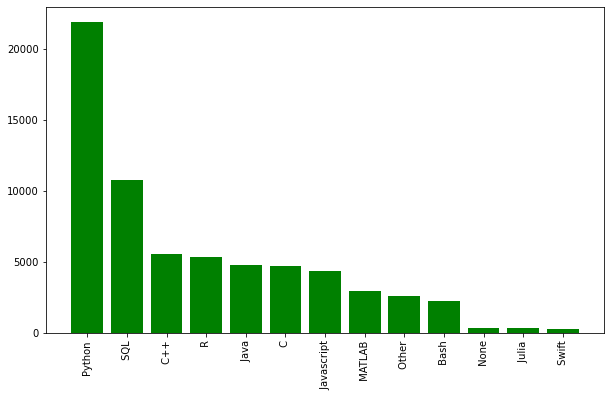

In [31]:
import matplotlib.pyplot as plt # countplot de lenguajes
plt.figure(figsize= (10,6))
plt.bar(lenguajes["lenguajes_programacion"],lenguajes["suma"], color = "green")
plt.xticks(rotation = 90)
plt.show()


In [33]:
nombres_ide = df_IDE.stack().value_counts().reset_index() # renombramos las columnas de IDE
nombres_ide.rename(columns= {"index": "IDE_name",0: "cantidad"}, inplace= True)
nombres_ide


,IDE_name,cantidad
0,Jupyter Notebook,16233
1,Visual Studio Code (VSCode),10040
2,PyCharm,7468
3,Jupyter (JupyterLab,5488
4,Jupyter Notebooks,5488
5,etc),5488
6,RStudio,4771
7,Visual Studio,4110
8,Notepad++,3937
9,Spyder,3794


In [34]:
nombres_ide.drop([4,5], axis= 0, inplace= True) # eliminamos las columnas con información doble
nombres_ide.replace("Jupyter (JupyterLab", "JupyterLab", inplace= True) #renombrar las que están mal escritas


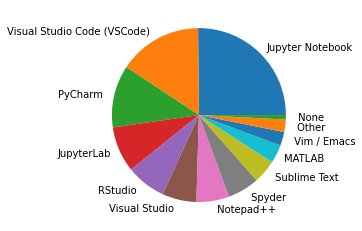

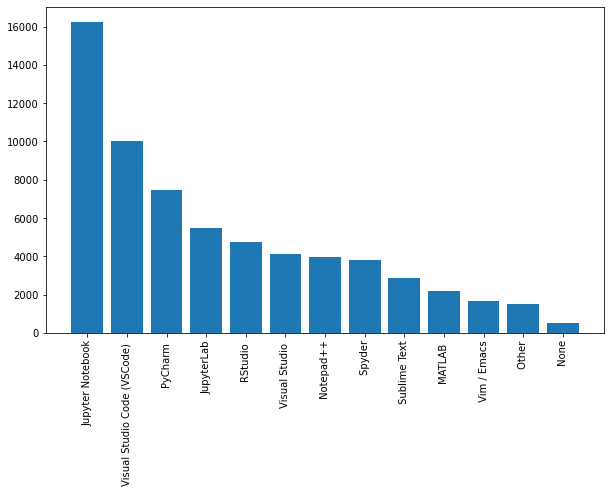

In [35]:

plt.figure()
plt.pie(nombres_ide["cantidad"], labels=nombres_ide["IDE_name"])
plt.show()
plt.figure(figsize= (10,6))
plt.bar(nombres_ide["IDE_name"],nombres_ide["cantidad"])
plt.xticks(rotation = 90)
plt.show()
